## Import Package

In [65]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

## Load Dataset

In [46]:
dfmain = pd.read_csv("Data_merged.csv",index_col=0)
dfmain.shape

(2079, 24)

In [129]:
dfmain["Close Price"].head()

0    1284.91
1    1261.52
2    1262.90
3    1252.31
4    1273.70
Name: Close Price, dtype: float64

In [149]:
list(dfmain)

['DATE',
 'time',
 'Close Price',
 'Open Price',
 'High Price',
 'Low Price',
 'Volume',
 'MACD',
 'CCI',
 'ATR',
 'BOLL',
 'EMA20',
 'MA10',
 'MTM6',
 'MA5',
 'MTM12',
 'ROC',
 'SMI',
 'WVAD',
 'US Dollar Index',
 'Federal Fund Rate',
 'BBB',
 'VIXCLS',
 'TEDRATE']

In [130]:
Close = dfmain["Close Price"]

In [175]:
# import all stock prices 
# ddf = pd.read_csv("SP500-2016.csv", index_col = 0)
# df.info()

numpy.ndarray

In [47]:
# df1 = pd.read_csv("Y1layer13-9.csv",header=None)
# df1.shape

(2077, 9)

In [181]:
df2 = pd.read_csv("Y3layer17-13-9.csv",header=None)
df2.shape

(2079, 9)

In [49]:
# df3 = pd.read_csv("Y3layer18-14-10.csv",header=None)
# df3.shape

(2079, 10)

In [50]:
# df4 = pd.read_csv("Y5levelWT1layer13-9.csv",header=None)
# df4.shape

(2077, 9)

In [51]:
# df5 = pd.read_csv("Y5levelWT3layer17-13-9.csv",header=None)
# df5.shape


(2079, 9)

In [52]:
# df6 = pd.read_csv("Y5levelWT3layer18-14-10.csv",header=None)
# df6.shape

(2079, 10)

In [184]:
df2[9] = Close

In [185]:
## DataFrame "Y1layer13-9.csv" with Close 
df2.head() 

0         1         2         3         4         5         6  \
0  0.300478  0.906541  0.866919  0.018999  0.844226  0.711908  0.894228   
1  0.421157  0.895837  0.322544  0.044195  0.782450  0.511056  0.810990   
2  0.465450  0.879125  0.162013  0.071072  0.741378  0.455651  0.760677   
3  0.530414  0.816210  0.043398  0.202538  0.616259  0.432602  0.615076   
4  0.577639  0.690425  0.104876  0.359157  0.499630  0.500673  0.522995   

          7         8        9  
0  0.183400  0.358648  1284.91  
1  0.178485  0.619065  1261.52  
2  0.189185  0.692327  1262.90  
3  0.232837  0.818989  1252.31  
4  0.313301  0.772878  1273.70

In [186]:
df2.shape

(2079, 10)

## Modify Dataset here--- Last column is "Close"

In [187]:
df = df2.copy() # Copy from the input dataset


In [188]:
# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

In [189]:
# number of different stocks: here is only one index of S&P 500
#print('\nnumber of different stocks: ', len(list(set(df.symbol))))
#print(list(set(df.symbol))[:10])
df.tail()

0         1         2         3         4         5         6  \
2074  0.041219  0.012669  0.586944  0.999841  0.052298  0.992359  0.100785   
2075  0.072550  0.031417  0.548243  0.999323  0.076225  0.986164  0.146725   
2076  0.186550  0.107261  0.581364  0.992799  0.115696  0.975808  0.261320   
2077  0.310537  0.189337  0.635402  0.971330  0.141966  0.966420  0.347770   
2078  0.725857  0.029825  0.590214  0.993014  0.066279  0.975506  0.387449   

             7         8        9  
2074  0.818994  0.963006  2146.10  
2075  0.762648  0.931189  2159.93  
2076  0.686087  0.810750  2171.37  
2077  0.644973  0.695038  2151.13  
2078  0.871140  0.473134  2168.27

In [190]:
df.describe()

0            1            2            3            4  \
count  2.079000e+03  2079.000000  2079.000000  2079.000000  2079.000000   
mean   5.581303e-01     0.477839     0.637574     0.465713     0.465304   
std    4.181367e-01     0.389536     0.365362     0.461332     0.376308   
min    5.960464e-08     0.000000     0.000000     0.000000     0.000002   
25%    3.841224e-02     0.051727     0.268161     0.000153     0.066287   
50%    7.073723e-01     0.444512     0.804038     0.294607     0.436800   
75%    9.797784e-01     0.918358     0.955448     0.999850     0.880364   
max    9.999993e-01     1.000000     1.000000     1.000000     0.999984   

                 5            6            7             8            9  
count  2079.000000  2079.000000  2079.000000  2.079000e+03  2079.000000  
mean      0.609370     0.514281     0.444373  4.741128e-01  1510.099153  
std       0.338800     0.364182     0.259089  3.939928e-01   414.400699  
min       0.001834     0.000011     0.000006  1.832155e-09   676.530000  
25%       0.288486     0.121595     0.235201  5.400614e-02  1173.705000  
50%       0.662259     0.555976     0.389660  4.040807e-01  1402.890000  
75%       0.960774     0.876901     0.643896  9.294023e-01  1940.895000  
max       0.999980     0.999998     0.999438  1.000000e+00  2190.150000

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 10 columns):
0    2079 non-null float64
1    2079 non-null float64
2    2079 non-null float64
3    2079 non-null float64
4    2079 non-null float64
5    2079 non-null float64
6    2079 non-null float64
7    2079 non-null float64
8    2079 non-null float64
9    2079 non-null float64
dtypes: float64(10)
memory usage: 162.5 KB


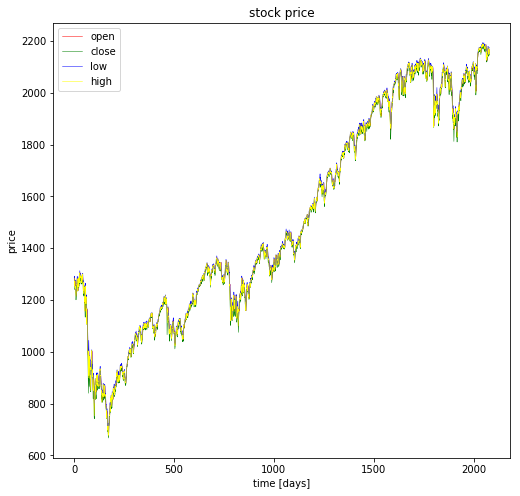

In [161]:
## This observation is only for raw_dataset, not from autoencoder result
## 'Close Price', 'Open Price','High Price','Low Price',
plt.figure(figsize=(18, 8));
plt.subplot(1,2,1);
plt.plot(dfmain['Open Price'], color='red', label='open',linewidth=0.5)
plt.plot(dfmain['Low Price'], color='green', label='close',linewidth=0.5)
plt.plot(dfmain['High Price'], color='blue', label='low',linewidth=0.5)
plt.plot(dfmain['Close Price'], color='yellow', label='high',linewidth=0.5)
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

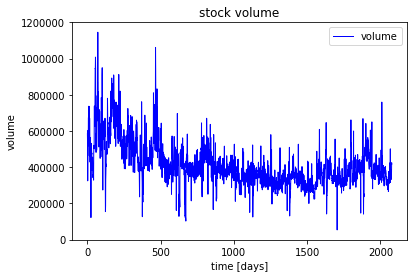

In [163]:
# plt.subplot(1,2,2);
plt.plot(dfmain["Volume"], color='b', label='volume',linewidth=1)
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');
plt.show()

## 3. Manipulate data <a class="anchor" id="3-bullet"></a> 

In [192]:
## Spring 2019
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    for i in range(df.shape[1]):
        df[i] = min_max_scaler.fit_transform(df[i].values.reshape(-1,1)) 
    return df

In [58]:
# - choose a specific stock
# - drop feature: volume
# - normalize stock data
# - create train, validation and test data sets

# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df

In [193]:
len(df)

2079

In [206]:
# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    print(len(data[0][0])) ## (len-20)*seq_len* features(include close)
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [207]:
 [x_train, y_train, x_valid, y_valid, x_test, y_test] = load_data(df, 20)

10


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [208]:
# choose one stock
df_stock = df.copy()
#df_stock.drop(['symbol'],1,inplace=True)
# df_stock.drop(['Volume'],1,inplace=True)
# df_stock.drop(['Adj Close'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10
x_train.shape =  (1647, 19, 10)
y_train.shape =  (1647, 10)
x_valid.shape =  (206, 19, 10)
y_valid.shape =  (206, 10)
x_test.shape =  (206, 19, 10)
y_test.shape =  (206, 10)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


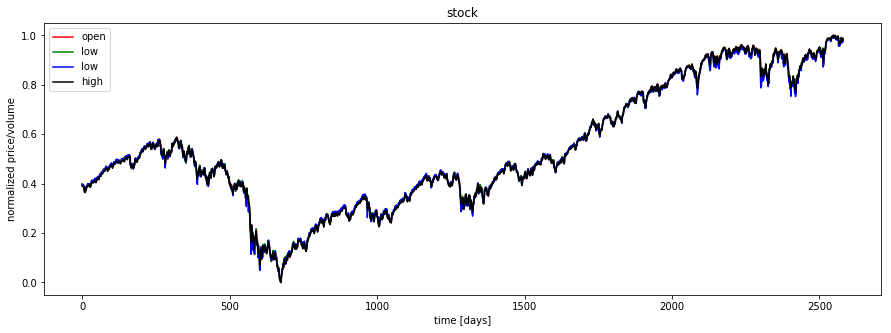

In [61]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.Open.values, color='red', label='open')
plt.plot(df_stock_norm.Close.values, color='green', label='low')
plt.plot(df_stock_norm.Low.values, color='blue', label='low')
plt.plot(df_stock_norm.High.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

## 4. Model and validate data <a class="anchor" id="4-bullet"></a>

In [209]:
 # - RNNs with basic, LSTM, GRU cells
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
print(perm_array)
np.random.shuffle(perm_array)

[   0    1    2 ... 1644 1645 1646]


In [210]:
# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size       
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

In [214]:
# parameters
n_steps = seq_len-1 
n_inputs = 10 
n_neurons = 512 # number of units is 200
n_outputs = 10
n_layers = 5  # layers should be 5
learning_rate = 0.001
batch_size = 50 # batch size should be 60
n_epochs = 50  # should be 5000
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
#layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
    #      for layer in range(n_layers)]

# use Basic LSTM Cell 
layers = [tf.contrib.rnn.BasicLSTMCell(name='basic_lstm_cell',num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.254516/0.291639
4.98 epochs: MSE train/valid = 0.092828/0.113888
9.96 epochs: MSE train/valid = 0.036117/0.039992
14.94 epochs: MSE train/valid = 0.030957/0.037961
19.91 epochs: MSE train/valid = 0.026369/0.039660
24.89 epochs: MSE train/valid = 0.025285/0.042960
29.87 epochs: MSE train/valid = 0.020597/0.036981
34.85 epochs: MSE train/valid = 0.019531/0.038447
39.83 epochs: MSE train/valid = 0.016871/0.035867
44.81 epochs: MSE train/valid = 0.014080/0.034555
49.79 epochs: MSE train/valid = 0.012420/0.036364


In [215]:
# # 5. Predictions <a class="anchor" id="5-bullet"></a> 
y_train.shape

(1647, 10)

In [216]:
y_valid.shape
49.79 epochs: MSE train/valid = 0.012420/0.036364

(206, 10)

In [217]:
y_test.shape

(206, 10)

correct sign prediction for close - open price for train/valid/test: 0.96/0.95/0.90


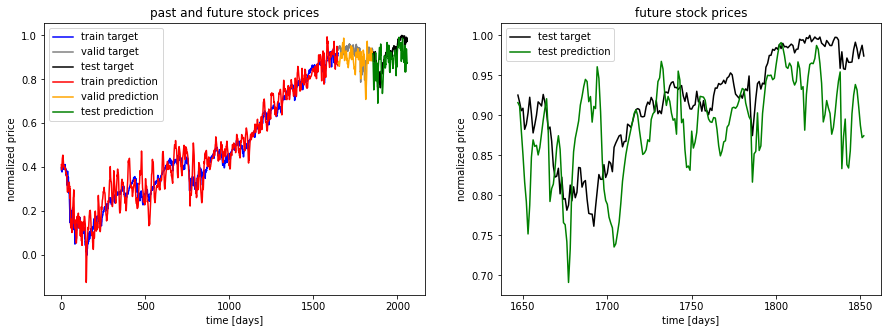

In [218]:
ft = 9  # 9 = close  # 0 = open, 1 = close, 2 = highest, 3 = lowest
## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,3]-y_train[:,0]),
            np.sign(y_train_pred[:,3]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,3]-y_valid[:,0]),
            np.sign(y_valid_pred[:,3]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,3]-y_test[:,0]),
            np.sign(y_test_pred[:,3]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))
plt.show()